In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
plt.style.use('ggplot')

df = pd.read_csv("D:\\Datasets\\aegypti_albopictus.csv")
print(data.head())

          VECTOR  OCCURRENCE_ID SOURCE_TYPE LOCATION_TYPE POLYGON_ADMIN     Y  \
0  Aedes aegypti              1   published         point          -999 -3.22   
1  Aedes aegypti              2   published         point          -999 -4.27   
2  Aedes aegypti              3   published         point          -999 -4.27   
3  Aedes aegypti              4   published         point          -999 -3.22   
4  Aedes aegypti              5   published         point          -999 -3.04   

       X  YEAR COUNTRY COUNTRY_ID  GAUL_AD0 STATUS  
0  40.07  1958   Kenya        KEN       133    NaN  
1  15.30  1960   Congo        COG        59    NaN  
2  15.30  1960   Congo        COG        59    NaN  
3  40.07  1960   Kenya        KEN       133    NaN  
4  40.14  1960   Kenya        KEN       133    NaN  


In [9]:
#Common values for each variable
for c in data.columns:
    counts = df
    [c].value_counts()
    print("\nFrequency of each value of %s:\n" % c)
    print(counts.head())
    print("\nUnique values of %s: %i\n" % (c, len(counts)))


Frequency of each value of VECTOR:

VECTOR
Aedes albopictus    22137
Aedes aegypti       19929
Name: count, dtype: int64

Unique values of VECTOR: 2


Frequency of each value of OCCURRENCE_ID:

OCCURRENCE_ID
1        1
28039    1
28041    1
28042    1
28043    1
Name: count, dtype: int64

Unique values of OCCURRENCE_ID: 42066


Frequency of each value of SOURCE_TYPE:

SOURCE_TYPE
unpublished    34581
published       7485
Name: count, dtype: int64

Unique values of SOURCE_TYPE: 2


Frequency of each value of LOCATION_TYPE:

LOCATION_TYPE
point              31271
polygon             9558
Less than 25km       248
Less than 100km      246
Less than 10km       190
Name: count, dtype: int64

Unique values of LOCATION_TYPE: 8


Frequency of each value of POLYGON_ADMIN:

POLYGON_ADMIN
-999               31271
2                   8932
Less than 100km      264
Less than 25km       258
Less than 10km       235
Name: count, dtype: int64

Unique values of POLYGON_ADMIN: 5


Frequency of each value

(-1.099999036103461,
 1.099988203720198,
 -1.0999991651668175,
 1.0999959043418757)

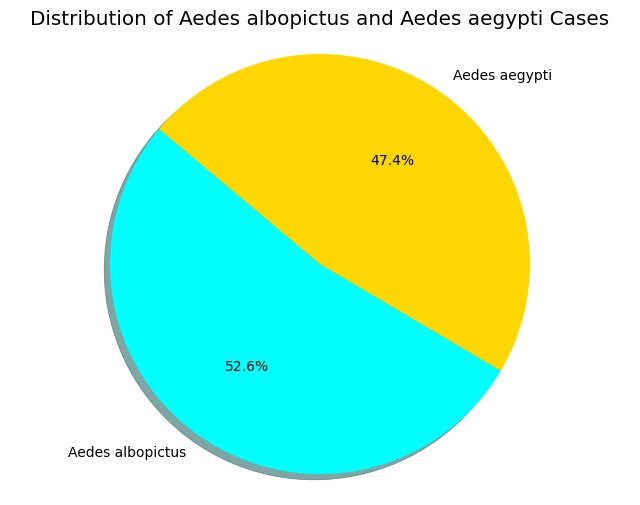

In [14]:
#Visualize the distribution of cases between these two species.
x = df.iloc[:,0].tolist() #names
a_alb = x.count('Aedes albopictus') 
alb_pc = round(a_alb/len(x)*100,2) 

a_aeg = x.count('Aedes aegypti') 
aeg_pc = round(a_aeg/len(x)*100,2) 

labels = ['Aedes albopictus', 'Aedes aegypti']
cols = ['cyan', 'gold']
sizes = [alb_pc,aeg_pc]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors = cols, startangle=140)
plt.title('Distribution of Aedes albopictus and Aedes aegypti Cases')
plt.axis('equal')

[Text(0, 0.5, 'Log No. of Cases')]

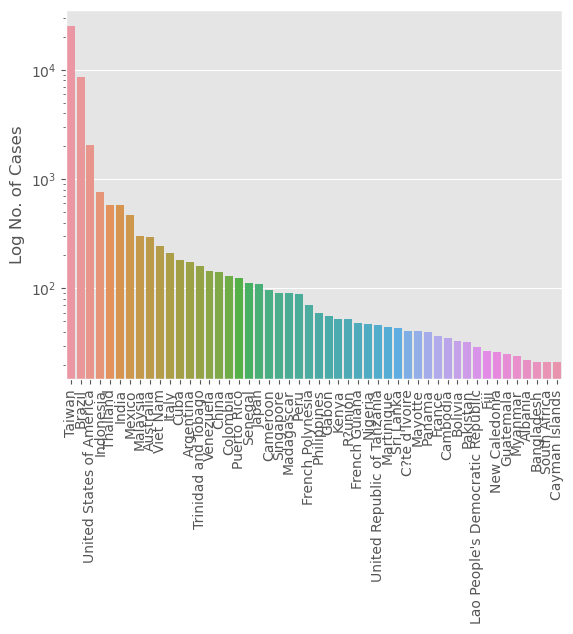

In [16]:
#Top50 
#Barplot of number of cases per country
country_group = df.groupby(['COUNTRY']).count() 
country_group.iloc[:,1] = country_group.iloc[:,1].astype(float)

country_group_sorted = country_group.sort_values('VECTOR', ascending = 0)
countries = country_group_sorted.index.tolist()

country_group_sorted_sub = country_group_sorted.iloc[:50,:] 
countries_sub = countries[:50] 

p = sns.barplot(x=countries_sub, y=country_group_sorted_sub.iloc[:,0])
p.set(yscale="log")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
p.set(ylabel='Log No. of Cases')

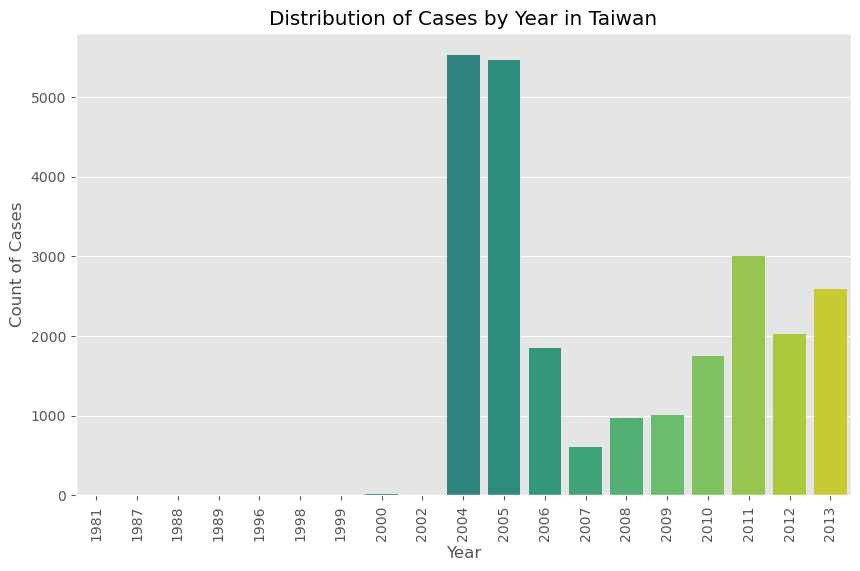

In [31]:
# Drop NA values from the 'YEAR' column
taiwan = taiwan.dropna(subset=['YEAR'])

# Convert 'YEAR' column to integer type
taiwan['YEAR'] = taiwan['YEAR'].astype(int)

# Group by 'YEAR' and count the number of cases for each year
yearly_cases_taiwan = taiwan.groupby('YEAR').size().reset_index(name='Count')

# Plot count of cases against years
plt.figure(figsize=(10, 6))
p = sns.barplot(x='YEAR', y='Count', data=yearly_cases_taiwan, palette='viridis')
p.set_xlabel('Year')
p.set_ylabel('Count of Cases')
p.set_title('Distribution of Cases by Year in Taiwan')
p.set_xticklabels(p.get_xticklabels(), rotation=90)  
plt.show()

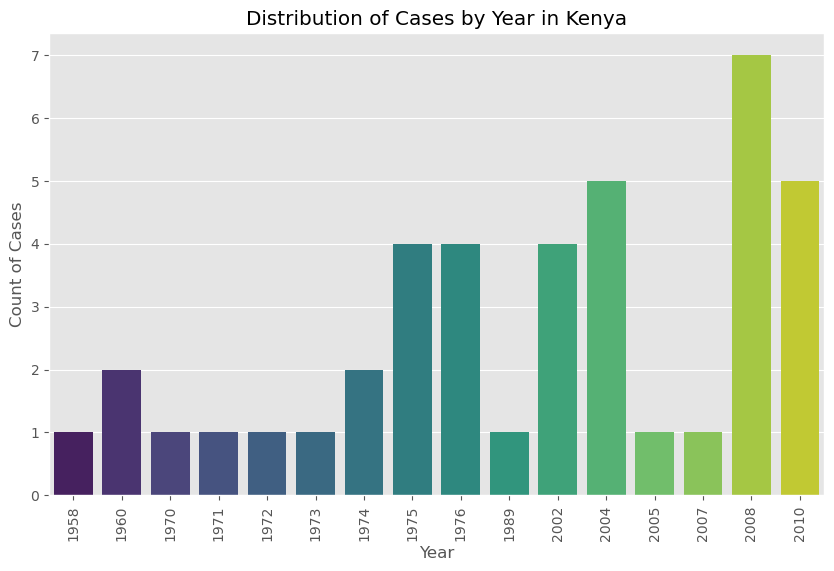

In [32]:
# Drop NA values from the 'YEAR' column
kenya = kenya.dropna(subset=['YEAR'])

# Convert 'YEAR' column to integer type
kenya['YEAR'] = kenya['YEAR'].astype(int)

# Group by 'YEAR' and count the number of cases for each year
yearly_cases = kenya.groupby('YEAR').size().reset_index(name='Count')

# Plot count of cases against years
plt.figure(figsize=(10, 6))
p = sns.barplot(x='YEAR', y='Count', data=yearly_cases, palette='viridis')
p.set_xlabel('Year')
p.set_ylabel('Count of Cases')
p.set_title('Distribution of Cases by Year in Kenya')
p.set_xticklabels(p.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '1958'),
  Text(1, 0, '1960'),
  Text(2, 0, '1970'),
  Text(3, 0, '1971'),
  Text(4, 0, '1972'),
  Text(5, 0, '1973'),
  Text(6, 0, '1974'),
  Text(7, 0, '1975'),
  Text(8, 0, '1976'),
  Text(9, 0, '1989'),
  Text(10, 0, '2002'),
  Text(11, 0, '2004'),
  Text(12, 0, '2005'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2010')])

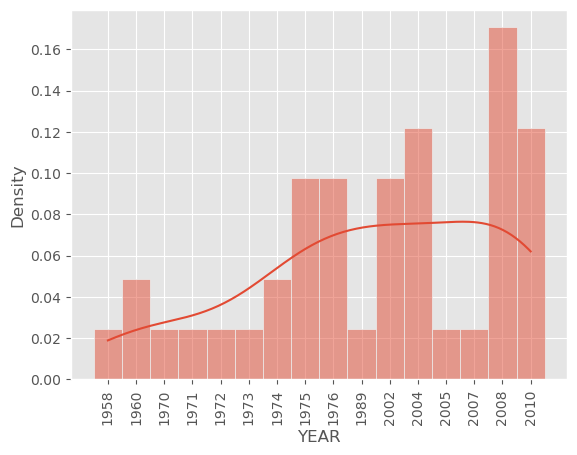

In [56]:
#Distribution plot for Kenya
kenya_data = df[df['COUNTRY'] == 'Kenya']
p = sns.histplot(kenya_data['YEAR'], kde=True, stat="density")
plt.xticks(rotation=90)

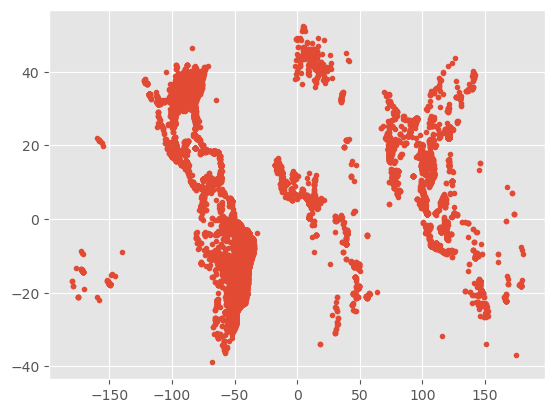

In [38]:
#Location Type
plt.plot(df['X'], df['Y'], '.')

<Axes: xlabel='SOURCE_TYPE'>

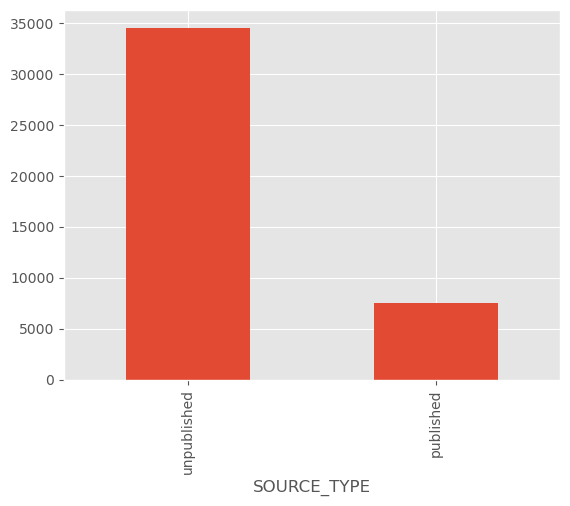

In [39]:
#Source type
df.SOURCE_TYPE.value_counts().plot(kind='bar')

<Axes: xlabel='LOCATION_TYPE'>

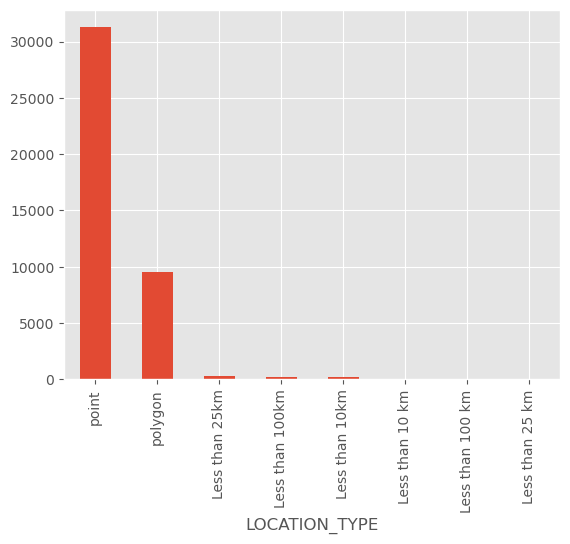

In [40]:
df.LOCATION_TYPE.value_counts().plot(kind='bar')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


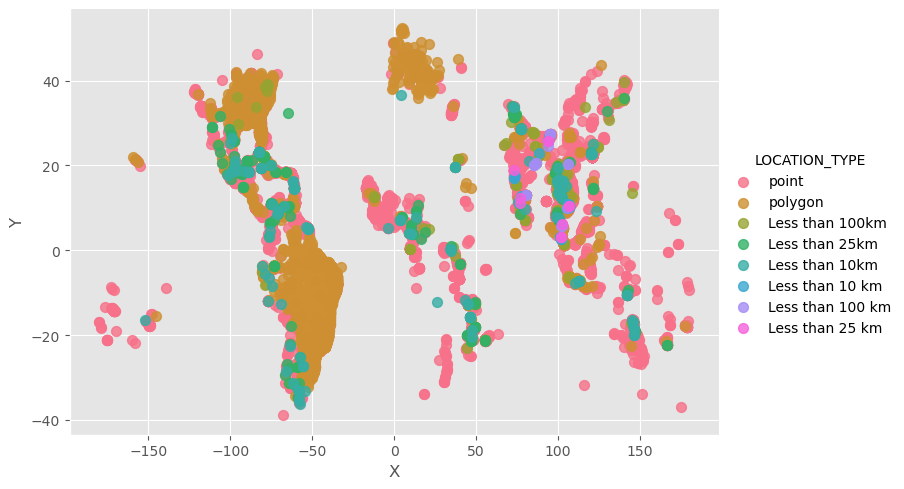

In [43]:
sns.lmplot(x='X', y='Y', data=df, hue='LOCATION_TYPE', fit_reg=False, aspect=1.5, scatter_kws={'s': 50})

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


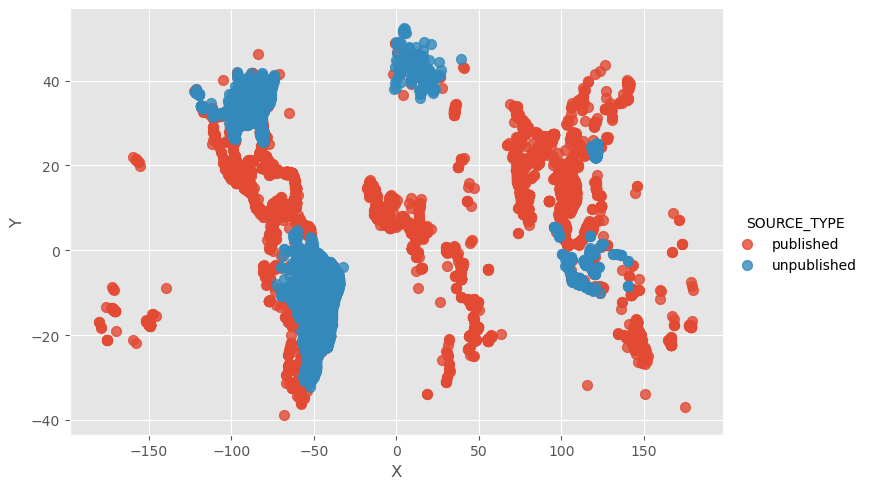

In [45]:
sns.lmplot(x='X', y='Y', data=df, hue='SOURCE_TYPE', fit_reg=False, aspect=1.5, scatter_kws={'s': 50})

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


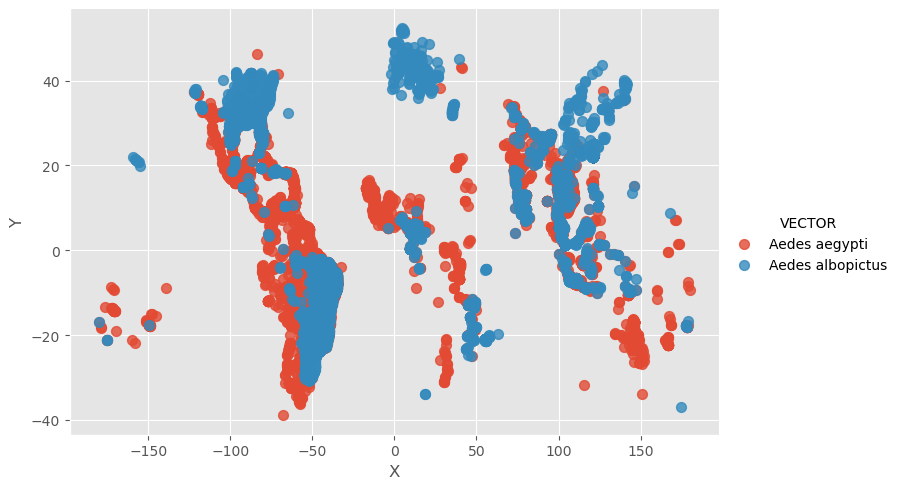

In [46]:
#Lets see locus of the different vector
sns.lmplot(x='X',y= 'Y', data=df, hue='VECTOR', fit_reg=False, aspect=1.5, scatter_kws={'s': 50})

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


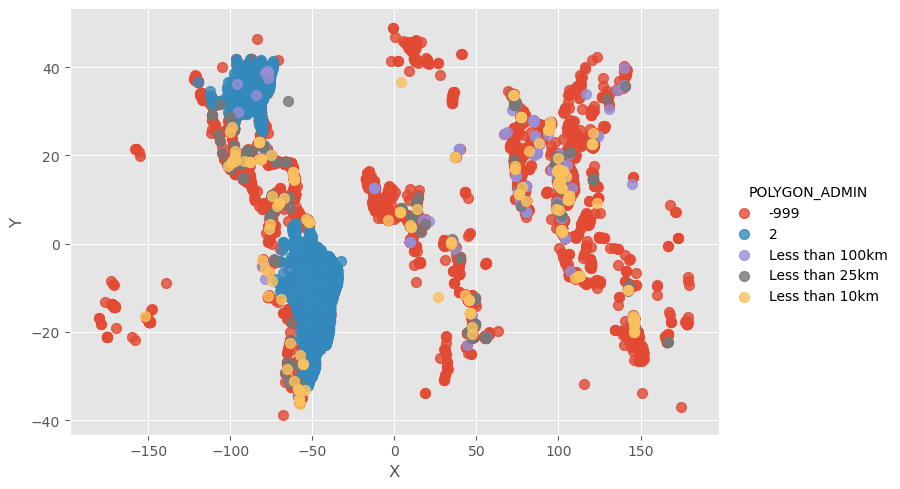

In [48]:
#Distance in KM
sns.lmplot(x='X',y='Y', data=df, hue='POLYGON_ADMIN', fit_reg=False, aspect=1.5, scatter_kws={'s': 50})

In [49]:
# This data was a Scout Script. Africa was not majorly covered, clearly. 